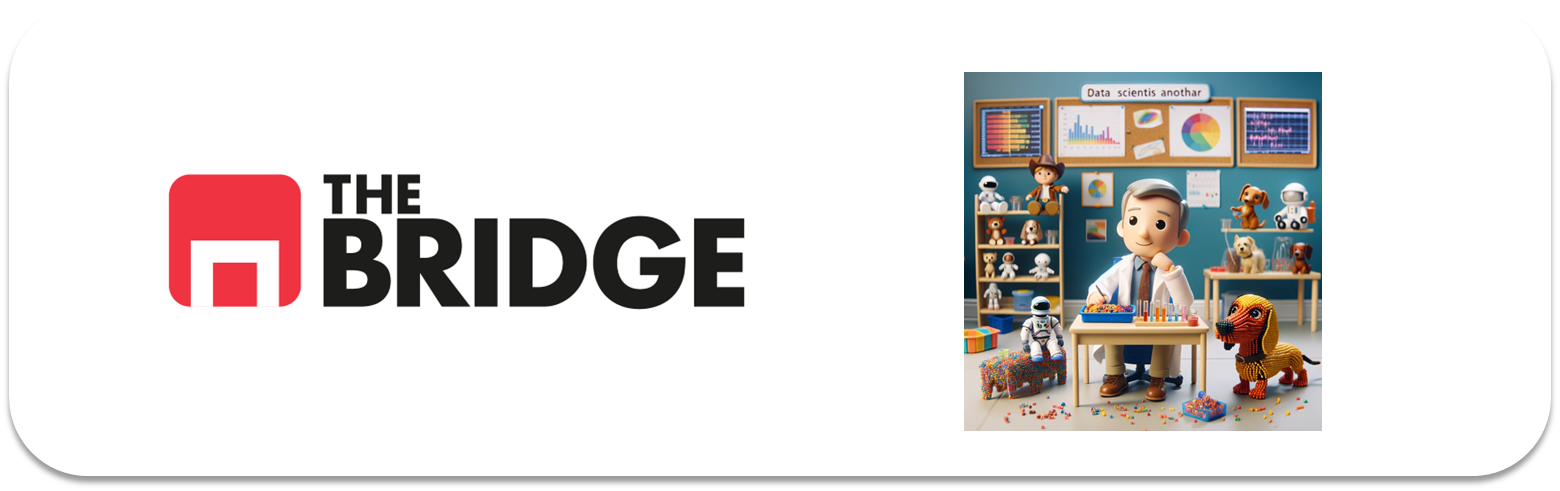

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True

from bootcampviztools import (pinta_distribucion_categoricas,
                              plot_categorical_relationship_fin,
                              plot_categorical_numerical_relationship,
                              plot_combined_graphs,
                              plot_grouped_boxplots,
                              plot_grouped_histograms,
                              grafico_dispersion_con_correlacion,
                              bubble_plot)

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Hay nulos en los campos 'age', 'embarked', 'deck' y 'embark_town'

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [9]:
for columna in df_titanic.columns:
    porcentaje = round(df_titanic[columna].isna().sum() / len(df_titanic) * 100, 2)
    if porcentaje > 0:
        print(f"Porcentaje de nulos de {columna}: {porcentaje}")

Porcentaje de nulos de age: 19.87
Porcentaje de nulos de embarked: 0.22
Porcentaje de nulos de deck: 77.22
Porcentaje de nulos de embark_town: 0.22


In [9]:
df_titanic.groupby(["survived", "deck"]).count()

C:\Users\lufue\AppData\Local\Temp\ipykernel_24700\109587128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby(["survived", "deck"]).count()


pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
survived deck                                                               
0        A          8    8    5      8      8     8         8      8    8   
         B         12   12   11     12     12    12        12     12   12   
         C         24   24   21     24     24    24        24     24   24   
         D          8    8    8      8      8     8         8      8    8   
         E          8    8    8      8      8     8         8      8    8   
         F          5    5    4      5      5     5         5      5    5   
         G          2    2    2      2      2     2         2      2    2   
1        A          7    7    7      7      7     7         7      7    7   
         B         35   35   34     35     35    35        33     35   35   
         C         35   35   30     35     35    35        35     35   35   
         D         25   25   23     25     25    25        25     25   25   
         E         24   24   22     24     24    24        24     24   24   
         F          8    8    7      8      8     8         8      8    8   
         G          2    2    2      2      2     2         2      2    2   

               adult_male  embark_town  alive  alone  
survived deck                                         
0        A              8            8      8      8  
         B             12           12     12     12  
         C             24           24     24     24  
         D              8            8      8      8  
         E              8            8      8      8  
         F              5            5      5      5  
         G              2            2      2      2  
1        A              7            7      7      7  
         B             35           33     35     35  
         C             35           35     35     35  
         D             25           25     25     25  
         E             24           24     24     24  
         F              8            8      8      8  
         G              2            2      2      2

In [10]:
# No parece que deck tenga afecte a la supervivencia, así que como tiene un alto porcentaje de nulos la elimino, además de la columna parch
df_titanic = df_titanic.drop(columns = ["deck", "parch"])

In [11]:
df_titanic[df_titanic["embarked"].isna() == True]

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [12]:
df_titanic[df_titanic["embark_town"].isna() == True]

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [13]:
# Los nulos de embarked y embark_town no se pueden rellenar

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [14]:
df_titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived | 0 representa fallecido y 1 superviviente |
| pclass | Clase en la que viajaba la persona indicada con números: primera, segunda o tercera |
| sex | Género del pasajero |
| age | Edad del pasajero |
| sibsp | Número de familiares que viajan con la persona |
| fare | Tarifa |
| embarked | Inicial de la letra de la ciudad de embarque |
| class | Clase en la que viajaba la persona |
| who | Categoría del pasajero (Hombre, mujer o niño/a) |
| adult_male | Indicador de hombre adulto (Verdadero o falso) |
|embark_town | Ciudad de embarque |
| alive | Indicador de supervivencia (Sí o no) |
|alone | Indicador de viajar solo (Verdadero o falso) |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [15]:
# Las ciudades son Southampton, Cherbourg y Queenstown.
# Las iniciales ya coinciden con embark_town:
df_titanic.groupby(["embarked", "embark_town"]).count()

,,survived,pclass,sex,age,sibsp,fare,class,who,adult_male,alive,alone
embarked,embark_town,,,,,,,,,,,
C,Cherbourg,168,168,168,130,168,168,168,168,168,168,168
Q,Queenstown,77,77,77,28,77,77,77,77,77,77,77
S,Southampton,644,644,644,554,644,644,644,644,644,644,644


In [16]:
df_titanic["embarked"] = df_titanic["embark_town"]
df_titanic["embarked"]

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embarked, Length: 891, dtype: object

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [ ]:
# survived, who, class, embarked, alone
columnas_categóricas = [
    "survived",
    "who",
    "class",
    "embarked",
    "alone"
]

In [19]:
# Como son categóricas calculo la moda
df_titanic[columnas_categóricas].mode().T

,0
survived,0
who,man
class,Third
embarked,Southampton
alone,True


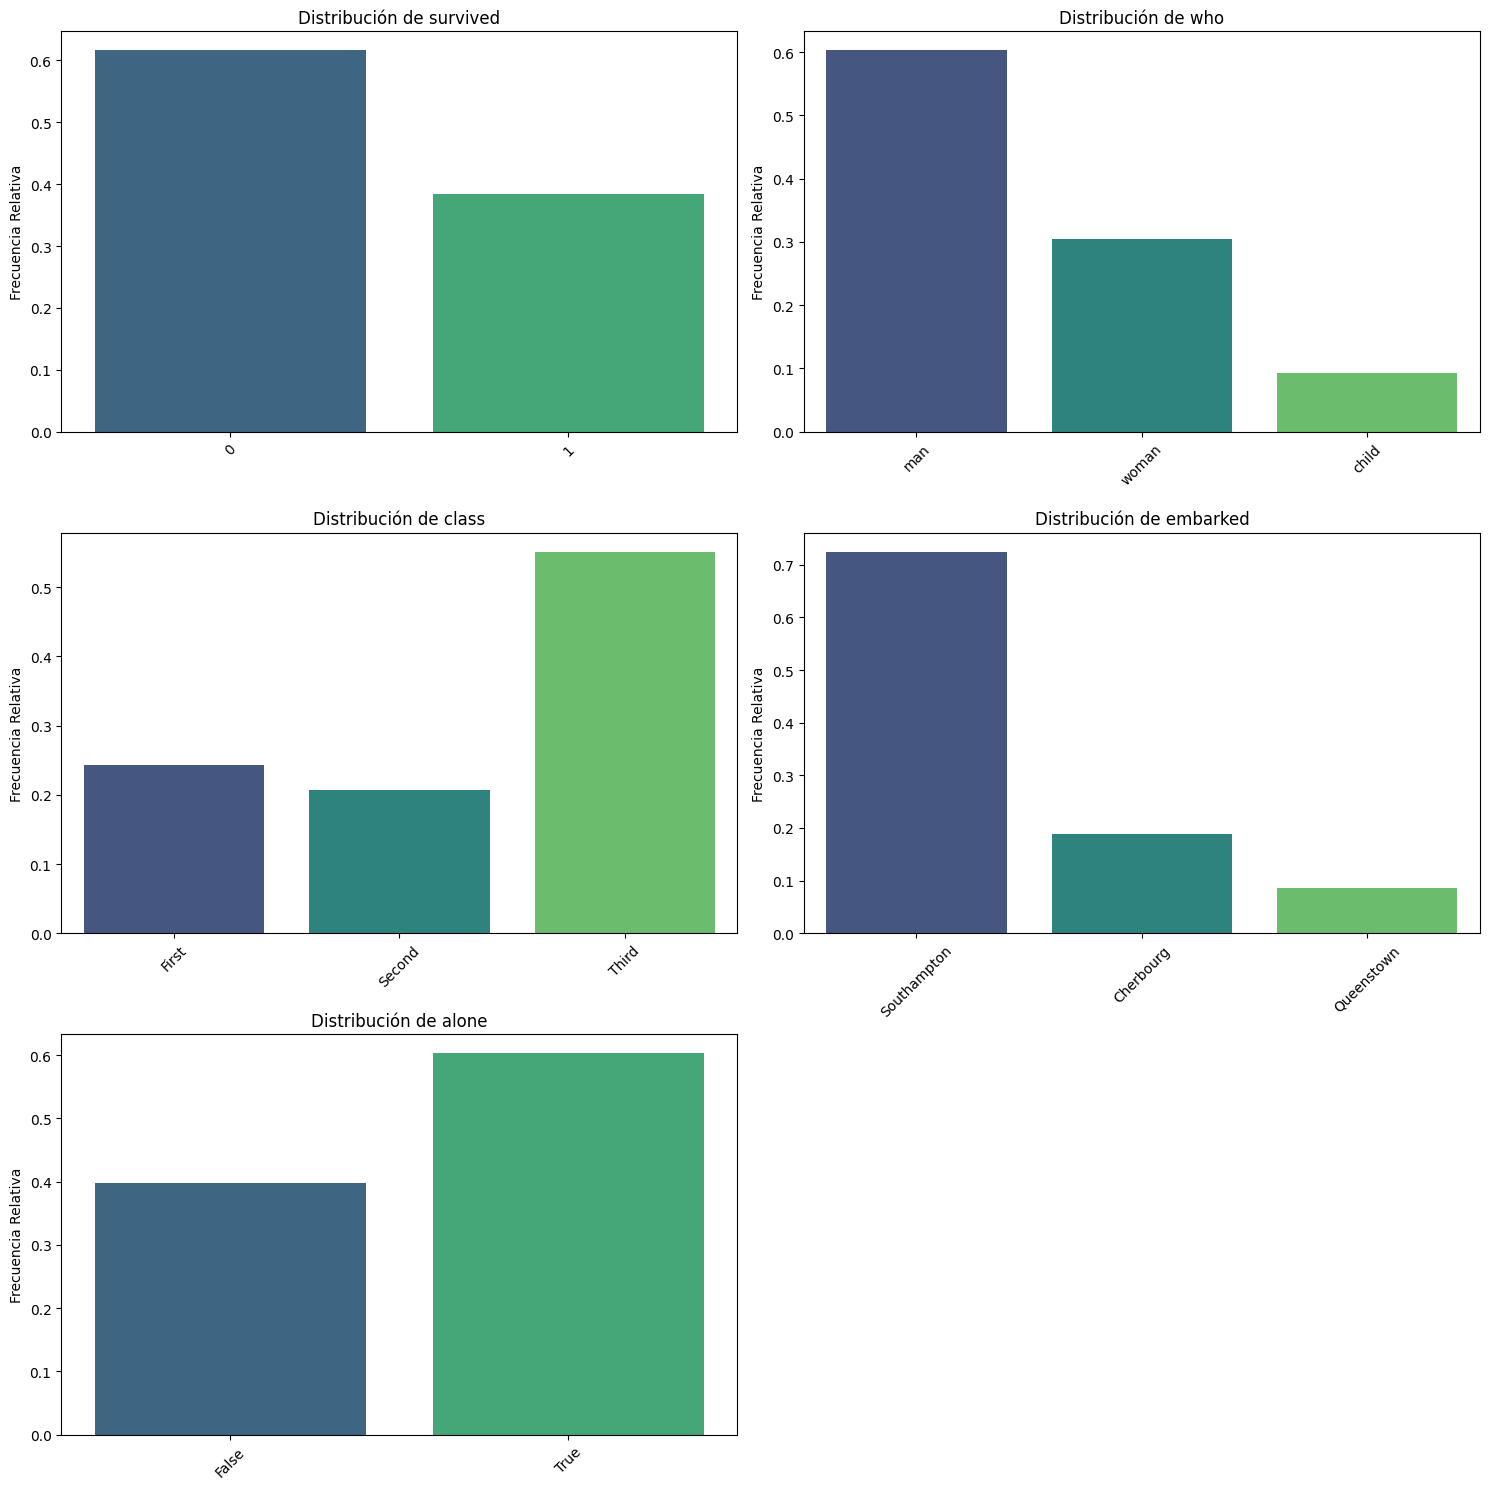

In [ ]:
# Frecuencias
pinta_distribucion_categoricas(df_titanic, columnas_categóricas, relativa = True)

1. Hay más fallecidos que supervivientes.
2. EL número de hombres es mucho mayor que el de mujeres y niños.
3. Mientras que no hay mucha diferencia en el número de personas que viajaban en primera y segunda clase, hay una gran diferencia del número de personas
que viajaban en tercera clase.
4. Southampton es la ciudad con mayor número de embarques.
5. Mayor el número de personas viajando solas.

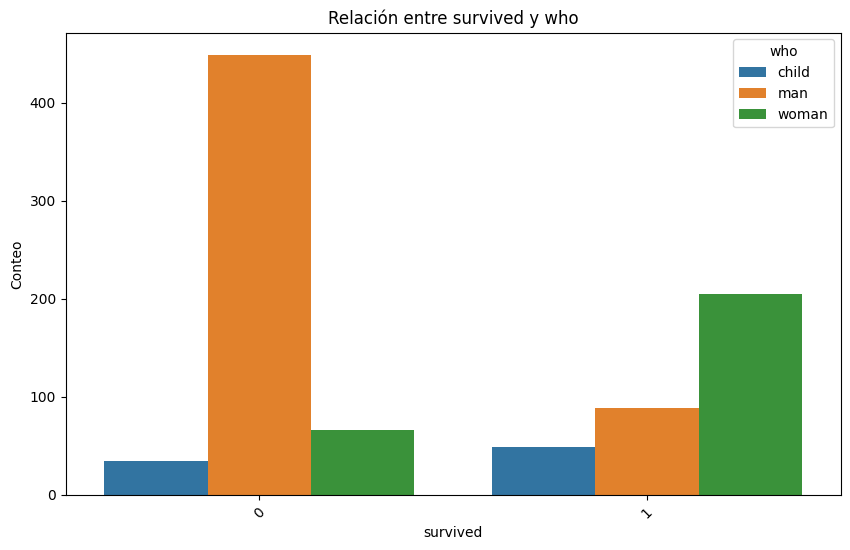

In [22]:
plot_categorical_relationship_fin(df_titanic, "survived", "who")

A pesar de hay más hombres en cantidad, han sobrevivido más mujeres

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\03_Data_Analysis\Sprint_07\Unidad_01_Estadistica_Descriptiva_Univariante\03_Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


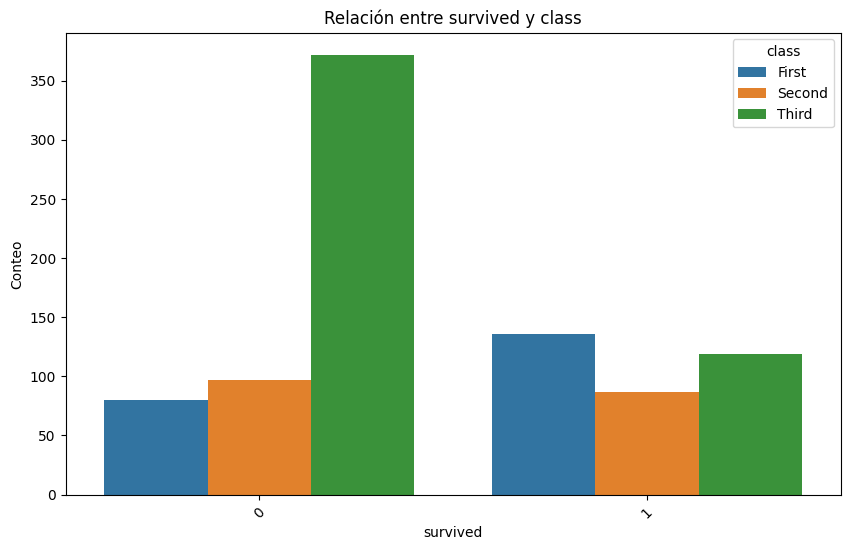

In [23]:
plot_categorical_relationship_fin(df_titanic, "survived", "class")

Parece que hay más supervivientes de los que viajaban en primera clase.

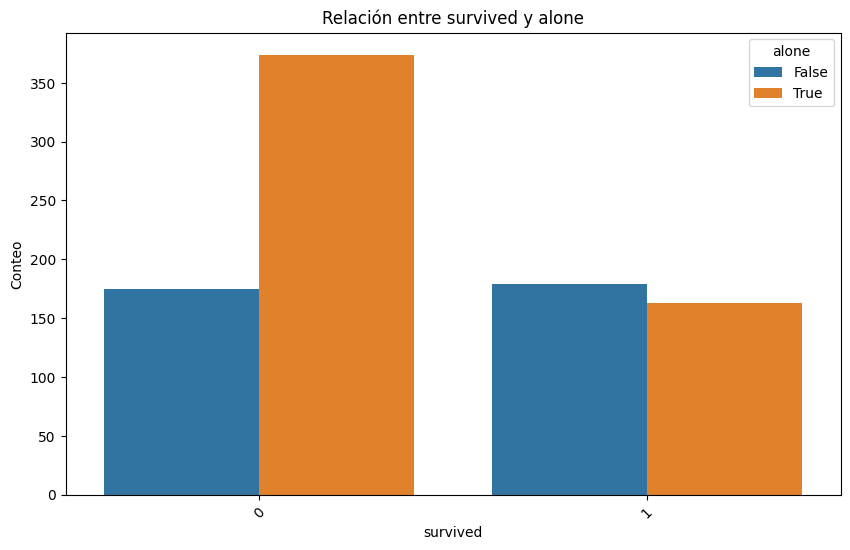

In [25]:
plot_categorical_relationship_fin(df_titanic, "survived", "alone")

Parece que lo que más ha influido en la supervivencia ha sido viajar en primera clase y ser mujer.

### #2.2 Numéricas

In [26]:
columnas_numéricas = ["age", "fare"]

In [29]:
df_titanic.loc[:,columnas_numéricas].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [30]:
print(df_titanic["fare"].quantile(0.5),
    df_titanic["fare"].quantile(0.9), 
      df_titanic["fare"].quantile(0.95),
     df_titanic["fare"].max())

14.4542 77.9583 112.07915 512.3292


Parece que hay dispersión en la distribución de las tarifas

(2, 2)


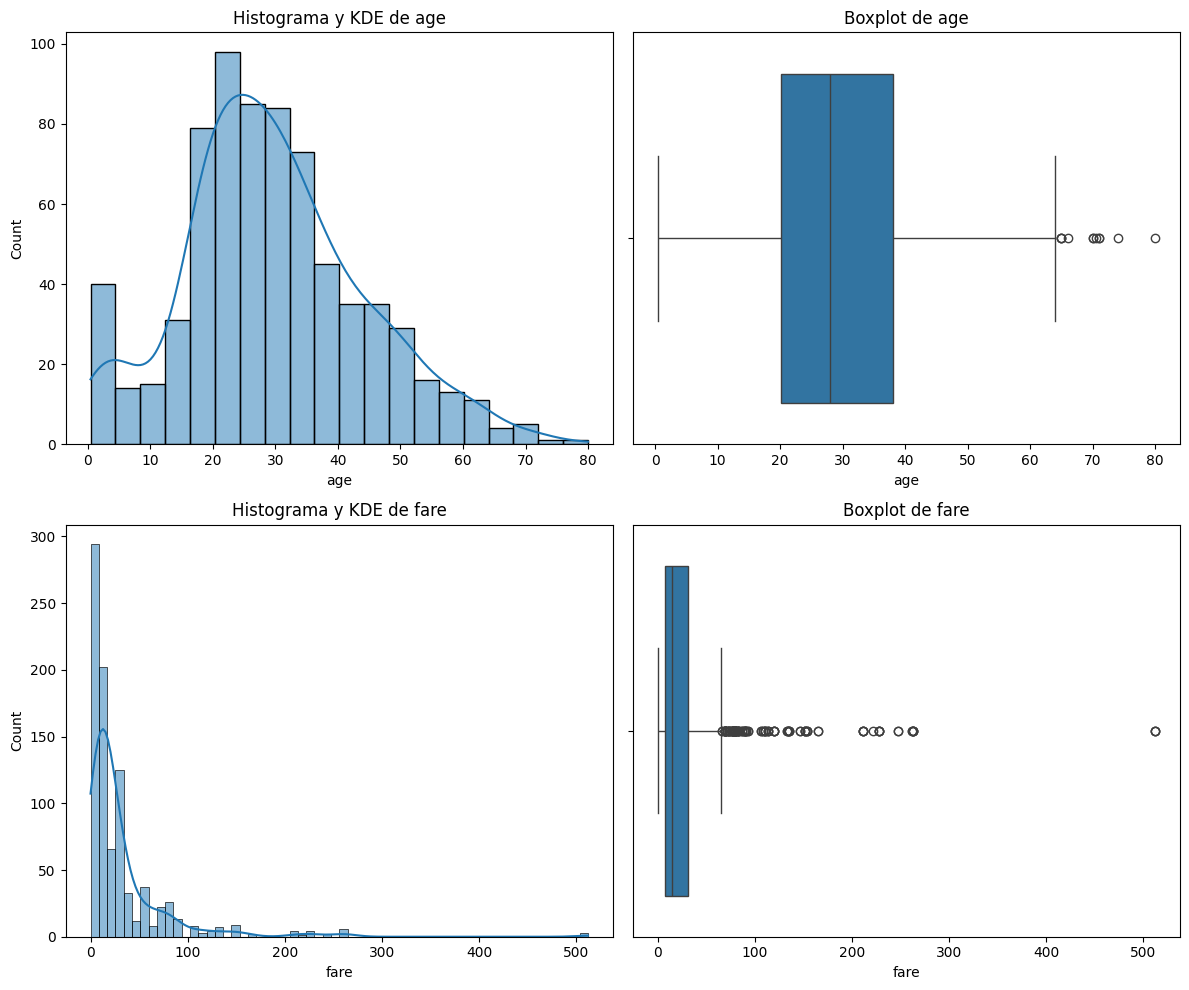

In [32]:
plot_combined_graphs(df_titanic, columnas_numéricas)

Efectivamente hay una gran dispersión, existen grupos y en ambos casos hay unos picos claros en los histogramas. Además, hay outliers en ambos casos, que ya se podía ver en el caso de las tarifas, por la larga cola de la función de densidad.